In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, classification_report, f1_score

pd.options.display.float_format = '{:,.6f}'.format

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [3]:
data.duplicated().sum()

125

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data = data.dropna().reset_index(drop=True)

In [7]:
data.Revenue = data.Revenue.astype('int')

In [8]:
def simple_preprocessing(data):
    data = data.drop_duplicates()
    data = data.dropna().reset_index(drop=True)
    
    data.Revenue = data.Revenue.astype('int')
    return data


In [9]:
# function to check outlier
def check_outlier(data,column):
    q1 = temp[column].quantile(0.25)
    q3 = temp[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

In [10]:
def administrative_encode(data):
    condition = [
    (data['Administrative'] >= 2),
    (data['Administrative'] < 2)
    ]

    values = [1, 0]

    data['Administrative'] = np.select(condition, values)

    return data

In [11]:
# Encode Administrative Duration
def administrative_duration_encode(data):
    condition = [
    (data['Administrative_Duration'] >= 34.1),
    (data['Administrative_Duration'] < 34.1)
    ]

    values = [1, 0]

    data['Administrative_Duration'] = np.select(condition, values)

    return data

In [12]:
# Encode exit rate
def exitrate_encode(data):
    condition = [
    (data['ExitRates'] <= 0.015909),
    (data['ExitRates'] > 0.015909)
    ]

    values = [1, 0]

    data['ExitRates'] = np.select(condition, values)

    return data

In [13]:
# Encode Product related
def product_encode(data):
    condition = [
    (data['ProductRelated'] >= 24),
    (data['ProductRelated'] < 24)
    ]

    values = [1, 0]

    data['ProductRelated'] = np.select(condition, values)
    
    return data



In [14]:
# Encode Bounce rate
def bouncerate_encode(data):
    condition = [
    (data['BounceRates'] == 0),
    (data['BounceRates'] > 0)
    ]

    values = [1, 0]

    data['BounceRates'] = np.select(condition, values)

    return data

In [15]:
# Encode Product related duration
def productduration_encode(data):
    condition = [
    (data['ProductRelated_Duration'] >= 893.45),
    (data['ProductRelated_Duration'] < 893.45)
    ]

    values = [1, 0]

    data['ProductRelated_Duration'] = np.select(condition, values)
    
    return data

In [16]:
# boxcox transformation
def boxcox_transform(data):
    transformed_data = pd.DataFrame()

    for column in data.columns:
        # Transformasi Box-Cox
        transformed_column, _ = stats.boxcox(data[column] + 1)  # Menambahkan 1 untuk menghindari log(0) dalam transformasi
        transformed_data[column] = transformed_column

    return transformed_data

In [17]:
def my_modeling(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    list_model = [
                LogisticRegression(),
                DecisionTreeClassifier(),
                RandomForestClassifier(random_state = 42),
                xgb.XGBClassifier(random_state = 42)  
    ]

    df = pd.DataFrame(columns = ['Method','F1 Score', 'Classification Report'])

    for model in list_model:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        method = str(type(model)).split('.')[-1][:-2]

        # AUC Score
        f1  = f1_score(y_test, y_pred)
        c_report = classification_report(y_test, y_pred, digits=6)

        df = df.append({'Method': method,  
                        'F1 Score' : f1,
                        'Classification Report': c_report},
                     ignore_index=True)
    return df

# Data Preparation 2 - Standar Scalling

In [10]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [11]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [12]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [13]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df2 = my_modeling(X_std,y)
df2['status'] = 'scaling'
df2

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.489552,precision recall f1-score ...,scaling
1,DecisionTreeClassifier,0.509372,precision recall f1-score ...,scaling
2,RandomForestClassifier,0.635678,precision recall f1-score ...,scaling
3,XGBClassifier,0.612943,precision recall f1-score ...,scaling


# Data Preparation 3 - Robust scaling

In [14]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [15]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [16]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [17]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler_robust = RobustScaler()
scaler_robust.fit(X)
X_std = scaler_robust.transform(X)

df3 = my_modeling(X_std,y)
df3['status'] = 'robust scaling'
df3

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.487294,precision recall f1-score ...,robust scaling
1,DecisionTreeClassifier,0.504444,precision recall f1-score ...,robust scaling
2,RandomForestClassifier,0.638994,precision recall f1-score ...,robust scaling
3,XGBClassifier,0.612943,precision recall f1-score ...,robust scaling


**tidak ada perubahaan yang berarti, gunakan standar scaling karena robust scaler karena dapat mengabaikan informasi detail tentang persebaran data akibat perhitungan median**

# Data Preparation 4 - Scaling with continue data

In [18]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [19]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [20]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [21]:
data_temp.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,"12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000"
mean,2.338878,81.646331,0.508726,34.825454,32.045637,"1,206.982457",0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,"1,919.601400",0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,"1,477.154762",0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,"3,398.750000",24.000000,"2,549.375000",705.000000,"63,973.522230",0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [22]:
data_temp['Administrative'] = StandardScaler().fit_transform(data_temp['Administrative'].values.reshape(len(data_temp), 1))
data_temp['Administrative_Duration'] = StandardScaler().fit_transform(data_temp['Administrative_Duration'].values.reshape(len(data_temp), 1))
data_temp['Informational'] = StandardScaler().fit_transform(data_temp['Informational'].values.reshape(len(data_temp), 1))
data_temp['Informational_Duration'] = StandardScaler().fit_transform(data_temp['Informational_Duration'].values.reshape(len(data_temp), 1))
data_temp['ProductRelated'] = StandardScaler().fit_transform(data_temp['ProductRelated'].values.reshape(len(data_temp), 1))
data_temp['ProductRelated_Duration'] = StandardScaler().fit_transform(data_temp['ProductRelated_Duration'].values.reshape(len(data_temp), 1))
data_temp['BounceRates'] = StandardScaler().fit_transform(data_temp['BounceRates'].values.reshape(len(data_temp), 1))
data_temp['ExitRates'] = StandardScaler().fit_transform(data_temp['ExitRates'].values.reshape(len(data_temp), 1))
data_temp['PageValues'] = StandardScaler().fit_transform(data_temp['PageValues'].values.reshape(len(data_temp), 1))
data_temp['ProductRelated'] = StandardScaler().fit_transform(data_temp['ProductRelated'].values.reshape(len(data_temp), 1))


In [23]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]

df4 = my_modeling(X,y)
df4['status'] = 'scaling with data continue'

In [24]:
df4

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.489552,precision recall f1-score ...,scaling with data continue
1,DecisionTreeClassifier,0.504918,precision recall f1-score ...,scaling with data continue
2,RandomForestClassifier,0.635678,precision recall f1-score ...,scaling with data continue
3,XGBClassifier,0.612943,precision recall f1-score ...,scaling with data continue


# Data Preparation 5 - Administrative encoding

In [81]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [82]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [83]:
temp = data.copy()

In [84]:
# function to check outlier
def check_outlier(data,column):
    q1 = temp[column].quantile(0.25)
    q3 = temp[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

<AxesSubplot:xlabel='Administrative', ylabel='Count'>

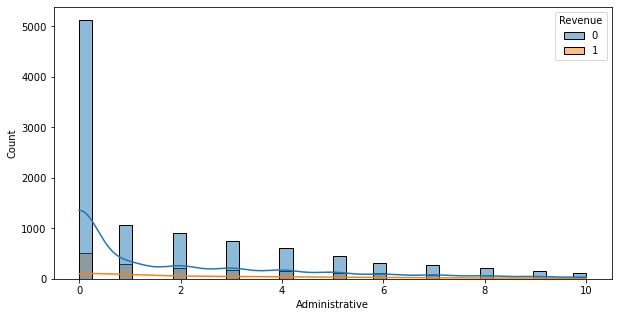

In [85]:


# Administrattive page 
temp['outlier_adm'] = check_outlier(data=temp, column='Administrative')

# filter outlier
temp = temp.loc[temp['outlier_adm'] == 'not out-lier']

# admnisitative page distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'Administrative'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [86]:
temp.groupby('Revenue').agg({'Administrative':['median']})

,Administrative
,median
Revenue,
0,0.000000
1,2.000000


In [87]:
# Encode Administrative

condition = [
    (data['Administrative'] >= 2),
    (data['Administrative'] < 2)
]

values = [1, 0]

data['Administrative'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [88]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [89]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df5 = my_modeling(X_std,y)
df5['status'] = 'scaling + adm encoding'

In [36]:
df5

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.491071,precision recall f1-score ...,scaling + adm encoding
1,DecisionTreeClassifier,0.527473,precision recall f1-score ...,scaling + adm encoding
2,RandomForestClassifier,0.635678,precision recall f1-score ...,scaling + adm encoding
3,XGBClassifier,0.619855,precision recall f1-score ...,scaling + adm encoding


**model sedikit mengalami peningkatan**

# Data Preparation 6 - Administrative duration encoding

In [90]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [91]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [92]:
temp = data.copy()

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Count'>

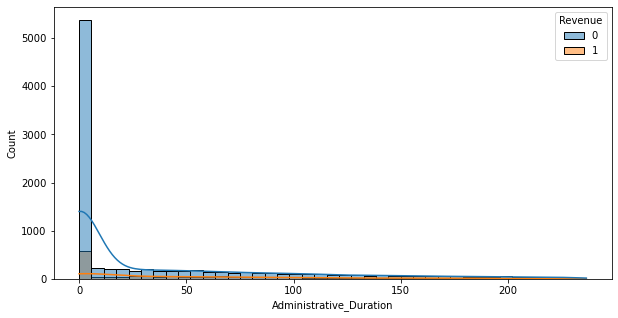

In [93]:

# Administrattive duration page 
temp['outlier_adm_duration'] = check_outlier(data=temp, column='Administrative_Duration')

# filter outlier
temp = temp.loc[temp['outlier_adm_duration'] == 'not out-lier']

# admnisitative page distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'Administrative_Duration'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [94]:
temp.groupby('Revenue').agg({'Administrative_Duration':['median']})

,Administrative_Duration
,median
Revenue,
0,0.000000
1,34.100000


In [95]:
# Encode Administrative Duration

condition = [
    (data['Administrative_Duration'] >= 34.1),
    (data['Administrative_Duration'] < 34.1)
]

values = [1, 0]

data['Administrative_Duration'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [96]:
# Encode Administrative

condition = [
    (data['Administrative'] >= 2),
    (data['Administrative'] < 2)
]

values = [1, 0]

data['Administrative'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [97]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [98]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df6 = my_modeling(X_std,y)
df6['status'] = 'scaling + adm and adm_dur encode'

In [99]:
df6

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.488823,precision recall f1-score ...,scaling + adm and adm_dur encode
1,DecisionTreeClassifier,0.537541,precision recall f1-score ...,scaling + adm and adm_dur encode
2,RandomForestClassifier,0.640898,precision recall f1-score ...,scaling + adm and adm_dur encode
3,XGBClassifier,0.627306,precision recall f1-score ...,scaling + adm and adm_dur encode


# Data Preparation 7 - ProductRelated encoding

In [100]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [101]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [102]:
temp = data.copy()

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

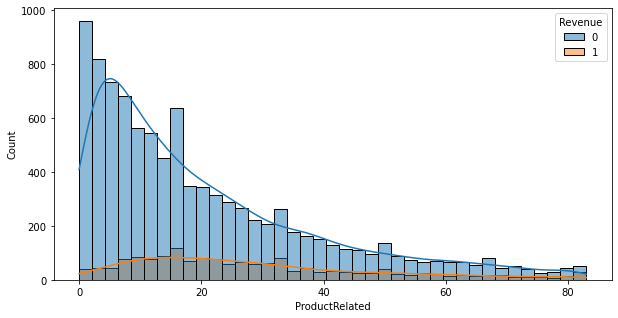

In [103]:

# product page 
temp['outlier_prod'] = check_outlier(data=temp, column='ProductRelated')

# filter outlier
temp = temp.loc[temp['outlier_prod'] == 'not out-lier']

# product page distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'ProductRelated'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [104]:
temp.groupby('Revenue').agg({'ProductRelated':['median']})

,ProductRelated
,median
Revenue,
0,15.000000
1,24.000000


In [105]:
# Encode Product related

condition = [
    (data['ProductRelated'] >= 24),
    (data['ProductRelated'] < 24)
]

values = [1, 0]

data['ProductRelated'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,0,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [108]:
# Encode Administrative

condition = [
    (data['Administrative'] >= 2),
    (data['Administrative'] < 2)
]

values = [1, 0]

data['Administrative'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [109]:
# Encode Administrative Duration

condition = [
    (data['Administrative_Duration'] >= 34.1),
    (data['Administrative_Duration'] < 34.1)
]

values = [1, 0]

data['Administrative_Duration'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [110]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,0,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,0,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [111]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df7 = my_modeling(X_std,y)
df7['status'] = 'scaling + adm and adm_dur encode + prod encode'

In [112]:
df7

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.492492,precision recall f1-score ...,scaling + adm and adm_dur encode + prod encode
1,DecisionTreeClassifier,0.501629,precision recall f1-score ...,scaling + adm and adm_dur encode + prod encode
2,RandomForestClassifier,0.629492,precision recall f1-score ...,scaling + adm and adm_dur encode + prod encode
3,XGBClassifier,0.615572,precision recall f1-score ...,scaling + adm and adm_dur encode + prod encode


# Data Preparation 8 - ProductRelated duration encoding

In [51]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [52]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [53]:
temp = data.copy()

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Count'>

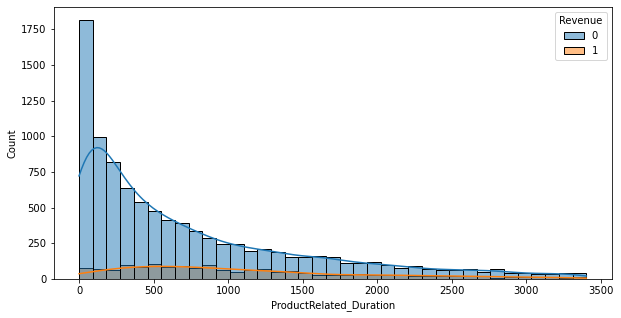

In [54]:
# product page 
temp['outlier_prod_dur'] = check_outlier(data=temp, column='ProductRelated_Duration')

# filter outlier
temp = temp.loc[temp['outlier_prod_dur'] == 'not out-lier']

# product page distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'ProductRelated_Duration'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [55]:
temp.groupby('Revenue').agg({'ProductRelated_Duration':['median']})

,ProductRelated_Duration
,median
Revenue,
0,460.750000
1,893.450000


In [66]:
# Encode Product related duration

condition = [
    (data['ProductRelated_Duration'] >= 893.45),
    (data['ProductRelated_Duration'] < 893.45)
]

values = [1, 0]

data['ProductRelated_Duration'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [67]:
# Encode Administrative

condition = [
    (data['Administrative'] >= 2),
    (data['Administrative'] < 2)
]

values = [1, 0]

data['Administrative'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [68]:
# Encode Administrative Duration

condition = [
    (data['Administrative_Duration'] >= 34.1),
    (data['Administrative_Duration'] < 34.1)
]

values = [1, 0]

data['Administrative_Duration'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [69]:
# Encode Product related

condition = [
    (data['ProductRelated'] >= 24),
    (data['ProductRelated'] < 24)
]

values = [1, 0]

data['ProductRelated'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [70]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [72]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df8 = my_modeling(X_std,y)
df8['status'] = 'scaling + adm and adm_dur encode + prod and prod_dur encode'

In [73]:
df8

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.492537,precision recall f1-score ...,scaling + adm and adm_dur encode + prod and pr...
1,DecisionTreeClassifier,0.538883,precision recall f1-score ...,scaling + adm and adm_dur encode + prod and pr...
2,RandomForestClassifier,0.607143,precision recall f1-score ...,scaling + adm and adm_dur encode + prod and pr...
3,XGBClassifier,0.617612,precision recall f1-score ...,scaling + adm and adm_dur encode + prod and pr...


# Data Preparation 9 - only Product and ProductRelated duration encoding

In [74]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [75]:
data = simple_preprocessing(data)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [76]:
# Encode Product related duration

condition = [
    (data['ProductRelated_Duration'] >= 893.45),
    (data['ProductRelated_Duration'] < 893.45)
]

values = [1, 0]

data['ProductRelated_Duration'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [77]:
# Encode Product related

condition = [
    (data['ProductRelated'] >= 24),
    (data['ProductRelated'] < 24)
]

values = [1, 0]

data['ProductRelated'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [78]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.000000,0,0.000000,0,0,0.200000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0.000000,0,0.000000,0,0,0.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [79]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df9 = my_modeling(X_std,y)
df9['status'] = 'scaling + prod and prod_dur encode'

In [80]:
df9

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.488024,precision recall f1-score ...,scaling + prod and prod_dur encode
1,DecisionTreeClassifier,0.532170,precision recall f1-score ...,scaling + prod and prod_dur encode
2,RandomForestClassifier,0.626752,precision recall f1-score ...,scaling + prod and prod_dur encode
3,XGBClassifier,0.622711,precision recall f1-score ...,scaling + prod and prod_dur encode


**performa model lebih baik pada saat melakukan encoding hanya pada feature administrative dan administrative duration**

# Data Preparation 10 - BounceRates encoding

In [123]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [124]:
data = simple_preprocessing(data)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [127]:
# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [128]:
temp = data.copy()

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

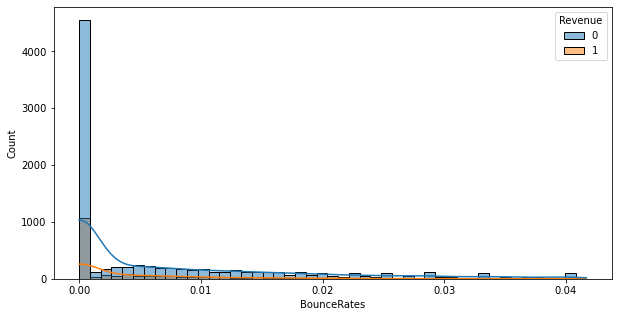

In [129]:
# bounce rate
temp['outlier_bounce'] = check_outlier(data=temp, column='BounceRates')

# filter outlier
temp = temp.loc[temp['outlier_bounce'] == 'not out-lier']

# bounce rate distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'BounceRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [130]:
temp.groupby('Revenue').agg({'BounceRates':['median']})

,BounceRates
,median
Revenue,
0,0.000000
1,0.000000


In [135]:
# Encode Bounce rate

condition = [
    (data['BounceRates'] == 0),
    (data['BounceRates'] > 0)
]

values = [1, 0]

data['BounceRates'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,1,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [136]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,1,0.100000,0.000000,0.000000,2,2,1,2,0


In [137]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df10 = my_modeling(X_std,y)
df10['status'] = 'scaling + adm & adm_dur encode + bounce encode'

In [138]:
df10

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.491803,precision recall f1-score ...,scaling + adm & adm_dur encode + bounce encode
1,DecisionTreeClassifier,0.535365,precision recall f1-score ...,scaling + adm & adm_dur encode + bounce encode
2,RandomForestClassifier,0.614610,precision recall f1-score ...,scaling + adm & adm_dur encode + bounce encode
3,XGBClassifier,0.601504,precision recall f1-score ...,scaling + adm & adm_dur encode + bounce encode


# Data Preparation 11 - Bounce Rates log transformation

In [143]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [144]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [147]:
# menambahkan epsilon untuk menghindari -inf
epsilon = 1e-8
data['BounceRates'] = data['BounceRates'].apply(lambda x: x + epsilon if x != 0 else x)

#log transformasi
data['BounceRates'] = np.log(data['BounceRates'])
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,-1.609438,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,-17.322068,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [149]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,-1.609438,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,-17.322068,0.100000,0.000000,0.000000,2,2,1,2,0


In [150]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df11 = my_modeling(X_std,y)
df11['status'] = 'scaling + adm & adm_dur encode + log bounce'

In [151]:
df11

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.489614,precision recall f1-score ...,scaling + adm & adm_dur encode + log bounce
1,DecisionTreeClassifier,0.546060,precision recall f1-score ...,scaling + adm & adm_dur encode + log bounce
2,RandomForestClassifier,0.640000,precision recall f1-score ...,scaling + adm & adm_dur encode + log bounce
3,XGBClassifier,0.625616,precision recall f1-score ...,scaling + adm & adm_dur encode + log bounce


# Data Preparation 12 - Drop bounce rate

In [152]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [153]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [154]:
data = data.drop('BounceRates', axis=1)
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [155]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.100000,0.000000,0.000000,2,2,1,2,0


In [157]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df12 = my_modeling(X_std,y)
df12['status'] = 'scaling + adm & adm_dur encode + drop bounce'

In [158]:
df12

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.489552,precision recall f1-score ...,scaling + adm & adm_dur encode + drop bounce
1,DecisionTreeClassifier,0.519824,precision recall f1-score ...,scaling + adm & adm_dur encode + drop bounce
2,RandomForestClassifier,0.617500,precision recall f1-score ...,scaling + adm & adm_dur encode + drop bounce
3,XGBClassifier,0.606965,precision recall f1-score ...,scaling + adm & adm_dur encode + drop bounce


**performa model lebih baik saat bounce rate apa adanya dengan encoding pada adm dan adm_duration**

# Data Preparation 13 - Exit Rates encoding

In [159]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [160]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [161]:
temp = data.copy()

<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

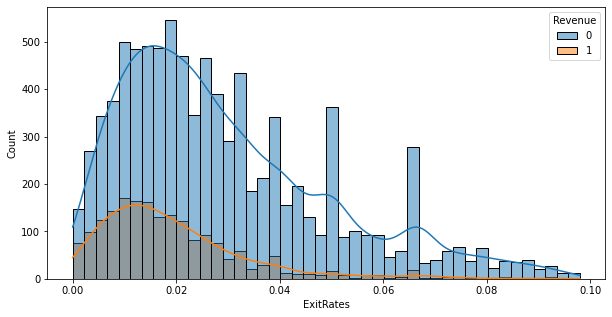

In [162]:
# exit rate
temp['outlier_exit'] = check_outlier(data=temp, column='ExitRates')

# filter outlier
temp = temp.loc[temp['outlier_exit'] == 'not out-lier']

# bounce rate distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'ExitRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [164]:
temp.groupby('Revenue').agg({'ExitRates':['median']})

,ExitRates
,median
Revenue,
0,0.024749
1,0.015909


In [165]:
# Encode exit rate

condition = [
    (data['ExitRates'] <= 0.015909),
    (data['ExitRates'] > 0.015909)
]

values = [1, 0]

data['ExitRates'] = np.select(condition, values)

data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [166]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,0,0.000000,0.000000,2,2,1,2,0


In [167]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df13 = my_modeling(X_std,y)
df13['status'] = 'scaling + adm & adm_dur encode + encode exit'

In [168]:
df13

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.491852,precision recall f1-score ...,scaling + adm & adm_dur encode + encode exit
1,DecisionTreeClassifier,0.525296,precision recall f1-score ...,scaling + adm & adm_dur encode + encode exit
2,RandomForestClassifier,0.633416,precision recall f1-score ...,scaling + adm & adm_dur encode + encode exit
3,XGBClassifier,0.601467,precision recall f1-score ...,scaling + adm & adm_dur encode + encode exit


# Data Preparation 14 - Exit Rates log transformation

In [13]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [14]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [15]:
# menambahkan epsilon untuk menghindari -inf
epsilon = 1e-8
data['ExitRates'] = data['ExitRates'].apply(lambda x: x + epsilon if x != 0 else x)

#log transformasi
data['ExitRates'] = np.log(data['ExitRates'])
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,-1.609438,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,-2.302585,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [16]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,-1.609438,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,-2.302585,0.000000,0.000000,2,2,1,2,0


In [17]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]

#exclude log exit rate
exclude = 'ExitRates'
columns_to_scale = [col for col in X.columns if col != exclude]

# scaling
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


# # fit modeling
# df14 = my_modeling(X,y)
# df14['status'] = 'scaling + adm & adm_dur encode + log exit'

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  OperatingSystems         12205 non-null  float64
 11  Browser                  12205 non-null  float64
 12  Region                   12205 non-null  float64
 13  TrafficType              12205 non-null  float64
dtypes: float64(14)
memory 

In [37]:
# # fit modeling
# df14 = my_modeling(X,y)
# df14['status'] = 'scaling + adm & adm_dur encode + log exit'

# Data Preparation 15 - Exit Rates drop

In [20]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [21]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [23]:
data = data.drop('ExitRates', axis=1)
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [ ]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df15 = my_modeling(X_std,y)
df15['status'] = 'scaling + adm & adm_dur encode + drop exitrates'

In [24]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [25]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [26]:
data = data.drop('ExitRates', axis=1)
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [27]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.000000,0.000000,2,2,1,2,0


In [28]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df15 = my_modeling(X_std,y)
df15['status'] = 'scaling + adm & adm_dur encode + drop exitrates'

In [29]:
df15

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.488889,precision recall f1-score ...,scaling + adm & adm_dur encode + drop exitrates
1,DecisionTreeClassifier,0.525424,precision recall f1-score ...,scaling + adm & adm_dur encode + drop exitrates
2,RandomForestClassifier,0.613527,precision recall f1-score ...,scaling + adm & adm_dur encode + drop exitrates
3,XGBClassifier,0.608905,precision recall f1-score ...,scaling + adm & adm_dur encode + drop exitrates


# Data Preparation 16 - Encode Page value

In [13]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [31]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [34]:
temp = data.copy()

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

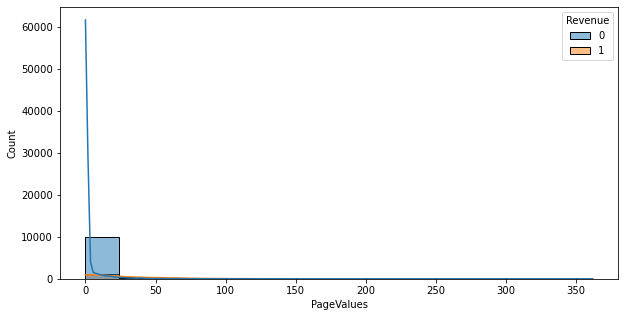

In [36]:
# distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = temp
            ,x = 'PageValues'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [41]:
temp.groupby('Revenue').agg({'PageValues':['median','mean', 'max','min']})

PageValues                              
            median      mean        max      min
Revenue                                         
0         0.000000  1.999985 246.758590 0.000000
1        16.758134 27.264518 361.763742 0.000000

In [ ]:
# Encode pagevalue

condition = [
    (data['PageValues'] <= 16.758134),
    (data['PageValues'] > 16.758134)
]

values = [1, 0]

data['PageValues'] = np.select(condition, values)

data.head(3)

In [42]:
temp = data.copy()

In [46]:
# exit rate
temp['outlier_page'] = check_outlier(data=temp, column='PageValues')

# filter outlier
temp = temp.loc[temp['outlier_page'] == 'not out-lier']
temp['PageValues'].value_counts()

# # bounce rate distribution
# f, ax = plt.subplots(1,1,figsize=(10,5))
# sns.histplot(data = temp
#             ,x = 'PageValues'
#             ,color = 'navy'
#             ,kde = True
#             , hue ='Revenue'
#             )

0.000000    9475
Name: PageValues, dtype: int64

In [ ]:
banyak 0 sebaiknya langsung di log tanpa iqr

In [14]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [15]:
# menambahkan epsilon untuk menghindari -inf
epsilon = 1e-8
data['ExitRates'] = data['ExitRates'].apply(lambda x: x + epsilon if x != 0 else x)

#log transformasi
data['ExitRates'] = np.log(data['ExitRates'])
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,-1.609438,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,-2.302585,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [16]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [17]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [18]:
# menambahkan epsilon untuk menghindari -inf
epsilon = 1e-8
data['PageValues'] = data['PageValues'].apply(lambda x: x + epsilon if x != 0 else x)

#log transformasi
data['PageValues'] = np.log(data['PageValues'])
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,-inf,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,-inf,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [19]:
data['PageValues'].value_counts()

-inf        9475
3.988762       6
3.744623       3
4.094145       2
2.782450       2
            ... 
1.898174       1
1.807358       1
3.341233       1
2.778238       1
2.504850       1
Name: PageValues, Length: 2704, dtype: int64

In [20]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [21]:
# preprocessing
data = simple_preprocessing(data)

# encode administrative features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [22]:
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [23]:
# menambahkan epsilon untuk menghindari -inf
epsilon = 1e-8
data['PageValues'] = data['PageValues'].apply(lambda x: x + epsilon if x != 0 else x)
data.head(5)
# #log transformasi
# data['PageValues'] = np.log(data['PageValues'])
# data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,0


In [24]:
#log transformasi
data['PageValues'] = np.log(data['PageValues'])
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,-inf,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,-inf,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [ ]:
# log transformation page value

# Data Preparation 17 - encode adm, adm dur, prod, prod dur, bounce rate, exit raete

In [13]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [19]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)
data = productduration_encode(data)
data = product_encode(data)
data = exitrate_encode(data)
data = bouncerate_encode(data)

In [21]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,0,0,1,0,0.000000,0.000000,2,2,1,2,0


In [24]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df17 = my_modeling(X_std,y)
df17['status'] = 'scaling + adm,adm_dur,prod,prod_dur,br,er encode'

In [25]:
df17

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.487294,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er encode"
1,DecisionTreeClassifier,0.517280,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er encode"
2,RandomForestClassifier,0.584577,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er encode"
3,XGBClassifier,0.586957,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er encode"


**performa model tidak meningkat, masih jauh lebih baik data preparation 6**

# Data preparation 18 - drop special day

In [27]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [28]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [29]:
data = data.drop('SpecialDay', axis=1)
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0


In [30]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,2,2,1,2,0


In [31]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df18 = my_modeling(X_std,y)
df18['status'] = 'scaling + adm,adm_dur encode + drop specialday'

In [32]:
df18

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.489552,precision recall f1-score ...,"scaling + adm,adm_dur encode + drop specialday"
1,DecisionTreeClassifier,0.520788,precision recall f1-score ...,"scaling + adm,adm_dur encode + drop specialday"
2,RandomForestClassifier,0.635561,precision recall f1-score ...,"scaling + adm,adm_dur encode + drop specialday"
3,XGBClassifier,0.615385,precision recall f1-score ...,"scaling + adm,adm_dur encode + drop specialday"


# Data preparation 19 - freq encoding month

In [33]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [35]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [38]:
# freq encode month
from category_encoders import CountEncoder
data = CountEncoder(cols=['Month'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,1,1,1,1,Returning_Visitor,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,2,2,1,2,Returning_Visitor,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,4,1,9,3,Returning_Visitor,False,0
3,0,0,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.014830,3,2,2,4,Returning_Visitor,False,0
4,0,0,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.014830,3,3,1,4,Returning_Visitor,True,0


In [39]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,1,1,1,1,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,2,2,1,2,0


In [40]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df19 = my_modeling(X_std,y)
df19['status'] = 'scaling + adm,adm_dur encode + month encode'

In [41]:
df19

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.492537,precision recall f1-score ...,"scaling + adm,adm_dur encode + month encode"
1,DecisionTreeClassifier,0.537797,precision recall f1-score ...,"scaling + adm,adm_dur encode + month encode"
2,RandomForestClassifier,0.637755,precision recall f1-score ...,"scaling + adm,adm_dur encode + month encode"
3,XGBClassifier,0.625616,precision recall f1-score ...,"scaling + adm,adm_dur encode + month encode"


# Data Preparation 20 - freq encodng rest features

In [42]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [43]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [44]:
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,False,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,False,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,False,0
3,0,0,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,False,0
4,0,0,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,True,0


In [45]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0


In [46]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df20 = my_modeling(X_std,y)
df20['status'] = 'scaling + adm,adm_dur encode + freq encode'

In [47]:
df20

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.497765,precision recall f1-score ...,"scaling + adm,adm_dur encode + freq encode"
1,DecisionTreeClassifier,0.550218,precision recall f1-score ...,"scaling + adm,adm_dur encode + freq encode"
2,RandomForestClassifier,0.634395,precision recall f1-score ...,"scaling + adm,adm_dur encode + freq encode"
3,XGBClassifier,0.636585,precision recall f1-score ...,"scaling + adm,adm_dur encode + freq encode"


# Data Preparation 21 - Freq+scaling+adm,admdur,prod,produr,er,br encode

In [48]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [49]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)
data = productduration_encode(data)
data = product_encode(data)
data = exitrate_encode(data)
data = bouncerate_encode(data)

In [50]:
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,False,0
1,0,0,0,0.000000,0,0,1,0,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,False,0
2,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,False,0
3,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,False,0
4,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,True,0


In [51]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue
0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0
1,0,0,0,0.000000,0,0,1,0,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0


In [52]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df21 = my_modeling(X_std,y)
df21['status'] = 'scaling + adm,adm_dur,prod,prod_dur,br,er encode + freq encode'

In [53]:
df21

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.487218,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er enco..."
1,DecisionTreeClassifier,0.550336,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er enco..."
2,RandomForestClassifier,0.618989,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er enco..."
3,XGBClassifier,0.618582,precision recall f1-score ...,"scaling + adm,adm_dur,prod,prod_dur,br,er enco..."


# Data Preparation 22 - encode weekdays

In [54]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [55]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)

In [56]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

In [58]:
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0
3,0,0,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,0,0
4,0,0,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,1,0


In [60]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0


In [61]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df22 = my_modeling(X_std,y)
df22['status'] = 'scaling + adm,adm_durencode + freq encode + weekend'

In [62]:
df22

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.499257,precision recall f1-score ...,"scaling + adm,adm_durencode + freq encode + we..."
1,DecisionTreeClassifier,0.558040,precision recall f1-score ...,"scaling + adm,adm_durencode + freq encode + we..."
2,RandomForestClassifier,0.660782,precision recall f1-score ...,"scaling + adm,adm_durencode + freq encode + we..."
3,XGBClassifier,0.631835,precision recall f1-score ...,"scaling + adm,adm_durencode + freq encode + we..."


# Data Preparation 23 - all encode

In [63]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [64]:
# preprocessing
data = simple_preprocessing(data)

# encode features
data = administrative_encode(data)
data = administrative_duration_encode(data)
data = productduration_encode(data)
data = product_encode(data)
data = exitrate_encode(data)
data = bouncerate_encode(data)

In [65]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

In [66]:
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0,0,0.000000,0,0,1,0,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0
3,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,0,0
4,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,1,0


In [67]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0,0,0.000000,0,0,1,0,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0


In [69]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df23 = my_modeling(X_std,y)
df23['status'] = 'scaling + encode all'

In [70]:
df23

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.493274,precision recall f1-score ...,scaling + encode all
1,DecisionTreeClassifier,0.542793,precision recall f1-score ...,scaling + encode all
2,RandomForestClassifier,0.622665,precision recall f1-score ...,scaling + encode all
3,XGBClassifier,0.614824,precision recall f1-score ...,scaling + encode all


# Data Preparation 24 - drop outlier pada feature2 dengan outlier tinggi

In [18]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [19]:
# preprocessing
data = simple_preprocessing(data)

In [20]:
numericals = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [21]:
### Descriptive Statistic
data[numericals].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,"12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000","12,205.000000"
mean,2.338878,81.646331,0.508726,34.825454,32.045637,"1,206.982457",0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,"1,919.601400",0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,"1,477.154762",0.016667,0.048529,0.000000,0.000000
max,27.000000,"3,398.750000",24.000000,"2,549.375000",705.000000,"63,973.522230",0.200000,0.200000,361.763742,1.000000


In [24]:
# outlier detection

def calculate_outlier_percentage(data):
    outlier_percentage = pd.DataFrame(columns=['Column', 'Outlier Percentage'])

    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percentage.loc[len(outlier_percentage)] = [column, (len(outliers) / len(data)) * 100]

    return outlier_percentage


In [27]:
outlier_percentages = calculate_outlier_percentage(data[numericals])
print(outlier_percentages)

                    Column  Outlier Percentage
0           Administrative            3.310119
1  Administrative_Duration            9.414175
2            Informational           21.556739
3   Informational_Duration           19.705039
4           ProductRelated            8.250717
5  ProductRelated_Duration            7.791889
6              BounceRates           11.700123
7                ExitRates           10.856206
8               PageValues           22.367882
9               SpecialDay           10.233511


**berdasarkan metode IQR feature yang memiliki outlier tinggi `PageValue`, `Informational`, `Informational_Duration`**

In [29]:
print('Jumlah baris sebelum handling outlier pada kolom PageValues:', len(data))
Q1 = data['PageValues'].quantile(0.25)
Q3 = data['PageValues'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['PageValues'] >= low_limit) & (data['PageValues'] <= high_limit))
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head(3)

Jumlah baris sebelum handling outlier pada kolom PageValues: 12205
Jumlah baris setelah memfilter outlier: 9475


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,0


In [30]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

In [31]:
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.018470,0.217414,0.204749,0.389446,0.202533,0.854670,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.018470,0.513668,0.641478,0.389446,0.296042,0.854670,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.018470,0.037256,0.204749,0.041161,0.182797,0.854670,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.018470,0.222691,0.641478,0.089077,0.082322,0.854670,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.018470,0.222691,0.010026,0.389446,0.082322,0.854670,1,0


In [32]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.018470,0.217414,0.204749,0.389446,0.202533,0.854670,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.018470,0.513668,0.641478,0.389446,0.296042,0.854670,0,0


In [33]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df24 = my_modeling(X_std,y)
df24['status'] = 'scaling + remove outlier + freq encoding+ weekend'

In [34]:
df24

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.000000,precision recall f1-score ...,scaling + remove outlier + freq encoding+ weekend
1,DecisionTreeClassifier,0.137931,precision recall f1-score ...,scaling + remove outlier + freq encoding+ weekend
2,RandomForestClassifier,0.042105,precision recall f1-score ...,scaling + remove outlier + freq encoding+ weekend
3,XGBClassifier,0.090909,precision recall f1-score ...,scaling + remove outlier + freq encoding+ weekend


**melakukan remove outlier pada data dengan outlier tinggi memperburuk peforma model**

# Data Preparation 25 - scaling + full freq encoding + weekend encoding

In [58]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [59]:
# preprocessing
data = simple_preprocessing(data)

In [60]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,1,0


In [61]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0


In [54]:
# transform dataset
transformed_data = boxcox_transform(data_temp)

In [55]:
X = data_temp.drop('Revenue', axis=1)
y = data_temp[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df25 = my_modeling(X_std,y)
df25['status'] = 'scaling +  + freq encoding+ weekend'

In [56]:
df25

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.494784,precision recall f1-score ...,scaling + box-cox transform + freq encoding+ w...
1,DecisionTreeClassifier,0.563319,precision recall f1-score ...,scaling + box-cox transform + freq encoding+ w...
2,RandomForestClassifier,0.641124,precision recall f1-score ...,scaling + box-cox transform + freq encoding+ w...
3,XGBClassifier,0.659287,precision recall f1-score ...,scaling + box-cox transform + freq encoding+ w...


# Data Preparation 26 - scaling + full freq encoding + weekend encoding + transformasi box-cox

In [18]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [19]:
# preprocessing
data = simple_preprocessing(data)

In [20]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,0.014830,0.207292,0.645883,0.092421,0.087341,0.854650,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,0.014830,0.207292,0.008603,0.386235,0.087341,0.854650,1,0


In [21]:
data_temp = data.select_dtypes(include=np.number)
data_temp.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0


In [37]:
data_temp.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [22]:
# transform dataset
column = data_temp[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

transformed_data = boxcox_transform(column)

In [24]:
transformed_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.000000,0.000000,0.000000,0.000000,0.696503,0.000000,0.025562,0.044254,0.000000,0.000000,0.015443,0.249148,0.293717,0.284245,0.195698,372.176060,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.107058,6.938392,0.000000,0.039613,0.000000,0.000000,0.015443,0.821272,2.176981,0.284245,0.320547,372.176060,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.696503,0.000000,0.025562,0.044254,0.000000,0.000000,0.015443,0.040525,0.293717,0.039836,0.164961,372.176060,0.000000
3,0.000000,0.000000,0.000000,0.000000,1.107058,1.509991,0.021784,0.042584,0.000000,0.000000,0.015443,0.246979,2.176981,0.085079,0.087350,372.176060,0.000000
4,0.000000,0.000000,0.000000,0.000000,2.438376,14.545761,0.013786,0.029794,0.000000,0.000000,0.015443,0.246979,0.008750,0.284245,0.087350,372.176060,0.172756


In [25]:
transformed_data = pd.concat([transformed_data, data_temp['Revenue']], axis = 1)

In [26]:
transformed_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.000000,0.000000,0.696503,0.000000,0.025562,0.044254,0.000000,0.000000,0.015443,0.249148,0.293717,0.284245,0.195698,372.176060,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,1.107058,6.938392,0.000000,0.039613,0.000000,0.000000,0.015443,0.821272,2.176981,0.284245,0.320547,372.176060,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.696503,0.000000,0.025562,0.044254,0.000000,0.000000,0.015443,0.040525,0.293717,0.039836,0.164961,372.176060,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,1.107058,1.509991,0.021784,0.042584,0.000000,0.000000,0.015443,0.246979,2.176981,0.085079,0.087350,372.176060,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,2.438376,14.545761,0.013786,0.029794,0.000000,0.000000,0.015443,0.246979,0.008750,0.284245,0.087350,372.176060,0.172756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,1.001328,3.951040,0.000000,0.000000,4.101844,19.588941,0.006213,0.021181,0.681291,0.000000,0.205580,0.040525,0.014663,0.284245,0.195698,372.176060,0.172756,0
12201,0.000000,0.000000,0.000000,0.000000,1.814298,13.312733,0.000000,0.016852,0.000000,0.000000,0.480354,0.246979,2.176981,0.284245,0.028104,372.176060,0.172756,0
12202,0.000000,0.000000,0.000000,0.000000,1.972512,9.971263,0.024463,0.037925,0.000000,0.000000,0.480354,0.246979,2.176981,0.284245,0.059652,372.176060,0.172756,0
12203,1.107243,3.535565,0.000000,0.000000,2.826803,12.163855,0.000000,0.016680,0.000000,0.000000,0.480354,0.821272,2.176981,0.164955,0.020238,372.176060,0.000000,0


In [27]:
transformed_data['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

In [40]:
X = transformed_data.drop('Revenue', axis=1)
y = transformed_data[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df26= my_modeling(X_std,y)
df26['status'] = 'scaling + box-cox + freq encoding+ weekend'

In [41]:
df26

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.632997,precision recall f1-score ...,scaling + box-cox + freq encoding+ weekend
1,DecisionTreeClassifier,0.575492,precision recall f1-score ...,scaling + box-cox + freq encoding+ weekend
2,RandomForestClassifier,0.637644,precision recall f1-score ...,scaling + box-cox + freq encoding+ weekend
3,XGBClassifier,0.657635,precision recall f1-score ...,scaling + box-cox + freq encoding+ weekend


# Data Preparation 27 - full freq encoding + weekend encoding + scaling + br and er encode

In [33]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [34]:
# preprocessing
data = simple_preprocessing(data)

In [37]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

#count encoder
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)

# bounce rate and exit rate encode
exitrate_encode(data)
bouncerate_encode(data)

data.head(3)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,1,1,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0,1,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0.000000,0,0.000000,1,0.000000,1,1,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0


In [42]:
X = data.drop('Revenue', axis=1)
y = data[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df27= my_modeling(X_std,y)
df27['status'] = 'scaling + freq encoding + weekend encod + br and er encode'

In [43]:
df27

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.495575,precision recall f1-score ...,scaling + freq encoding + weekend encod + br a...
1,DecisionTreeClassifier,0.537155,precision recall f1-score ...,scaling + freq encoding + weekend encod + br a...
2,RandomForestClassifier,0.625954,precision recall f1-score ...,scaling + freq encoding + weekend encod + br a...
3,XGBClassifier,0.627936,precision recall f1-score ...,scaling + freq encoding + weekend encod + br a...


# Data Preparation 28 - drop bounce rate dan exit rate 

In [44]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False


In [45]:
# preprocessing
data = simple_preprocessing(data)

In [46]:
#encode weekend
data.Weekend = data.Weekend.astype('int')

#count encoder
from category_encoders import CountEncoder
data = CountEncoder(cols=['OperatingSystems','Browser','Region','VisitorType','Month', 'TrafficType'], normalize=True).fit(data).transform(data)


In [49]:
# data = data.drop(['BounceRates','ExitRates'], axis=1)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.000000,0.000000,0.014830,0.208849,0.198853,0.386235,0.195658,0.854650,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.000000,0.014830,0.535928,0.645883,0.386235,0.320442,0.854650,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.000000,0.000000,0.014830,0.039164,0.198853,0.041376,0.164932,0.854650,0,0


In [50]:
X = data.drop('Revenue', axis=1)
y = data[['Revenue']]


scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df28= my_modeling(X_std,y)
df28['status'] = 'scaling + freq encoding + weekend encod + drop br and er'

In [51]:
df28

,Method,F1 Score,Classification Report,status
0,LogisticRegression,0.491124,precision recall f1-score ...,scaling + freq encoding + weekend encod + drop...
1,DecisionTreeClassifier,0.543879,precision recall f1-score ...,scaling + freq encoding + weekend encod + drop...
2,RandomForestClassifier,0.609911,precision recall f1-score ...,scaling + freq encoding + weekend encod + drop...
3,XGBClassifier,0.586503,precision recall f1-score ...,scaling + freq encoding + weekend encod + drop...


In [ ]:
# drop informational page dan duration (berdasarkan EDA banyak nilai 0)

In [ ]:
# perform smotee 

In [ ]:
# perform undersampling